<a href="https://colab.research.google.com/github/sandarnaing/tutorial/blob/main/rdkit_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Tutorial 1](https://www.youtube.com/watch?v=9Z9XM9xamDU&t=112s)

In [1]:
pip install rdkit-pypi

In [2]:
from rdkit import Chem

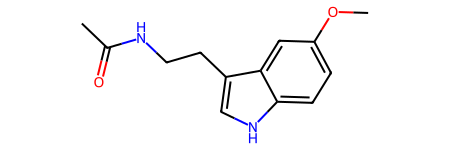

In [3]:
m = Chem.MolFromSmiles('CC(=O)NCCc1c[nH]c2ccc(OC)cc12')
m

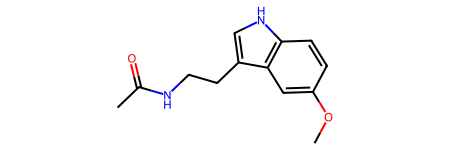

In [4]:
m1 = Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2')
m1

In [5]:
import requests

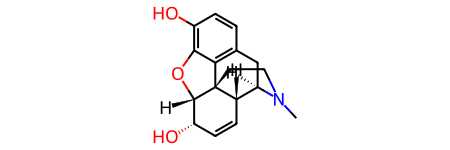

In [6]:
morphine_url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol'
morphine_mol = requests.get(morphine_url).text
morphine = Chem.MolFromMolBlock(morphine_mol)
morphine

In [7]:
morphine.GetNumAtoms()

21

In [10]:
[atom.GetSymbol() for atom in morphine.GetAtoms()]

['O',
 'O',
 'O',
 'N',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C']

In [11]:
morphine_with_hydrogens = Chem.AddHs(morphine)

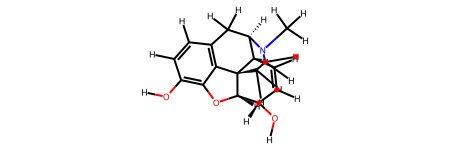

In [12]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(morphine_with_hydrogens)
morphine_with_hydrogens

In [15]:
from rdkit.Chem import Descriptors
Descriptors.MolWt(morphine)

285.34299999999996

In [16]:
Descriptors.MolLogP(morphine)

1.1980999999999997

In [17]:
Descriptors.NumRotatableBonds(morphine)

0

# [Tutorial 2 (part 1)](https://www.youtube.com/watch?v=ERvUf_lNopo)

In [1]:
pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 40.6 MB/s eta 0:00:00


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

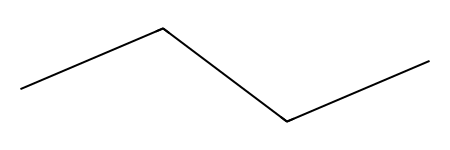

In [3]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [4]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [5]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

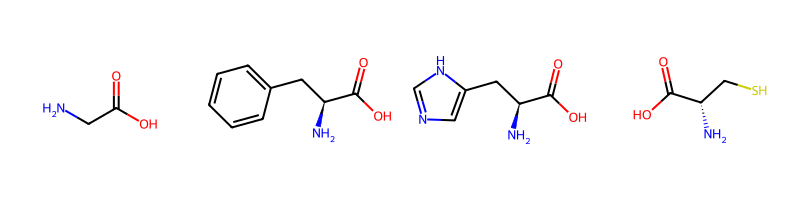

In [6]:
smiles_list = ['C(C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)N', 'C1=C(NC=N1)C[C@@H](C(=O)O)N', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

In [7]:
pattern = Chem.MolFromSmiles('S') #sulfur
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
False
True


In [8]:
pattern = Chem.MolFromSmiles('C(=O)O')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
True
True
True


In [9]:
pattern = Chem.MolFromSmarts('[r]') #ring
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
True
False


In [10]:
pattern = Chem.MolFromSmarts('[r5]') #5-memberedring
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
False
True
False


# [Tutorial 2 (part 2)](https://www.youtube.com/watch?v=3qzZbaUzo9M)

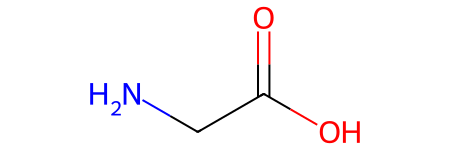

In [11]:
glycine = mol_list[0]
glycine

In [16]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

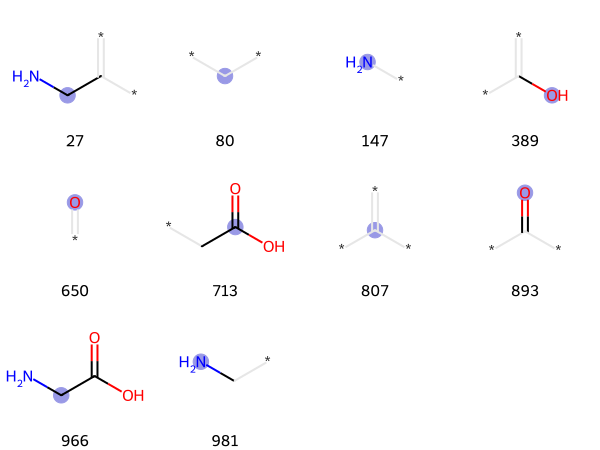

In [19]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow = 4, legends = [str(x) for x in fp.GetOnBits()])

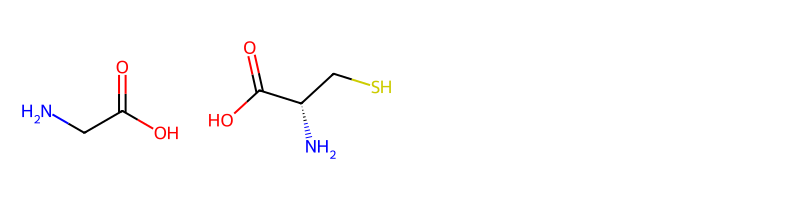

In [21]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow = 4)
img

In [25]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cys', list(fp2.GetOnBits()))
print('gly', list(fp.GetOnBits()))
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits())  |  set(fp.GetOnBits())
print(common)
print(combined)
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp, fp2))

cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
0.3
0.3
